In [10]:
%matplotlib inline

In [94]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import networkx as nx
import warnings

In [95]:
warnings.filterwarnings('ignore')

In [ ]:
plt.rcParams["figure.figsize"] = (50,40)

In [109]:
def plot_states(include=('WA', 'OR', 'ID', 'CA', 'NV', 'UT', 'AZ', 'NM', 'CO', 'WY', 'MT')):
    G = nx.read_edgelist('states.txt', delimiter=',')
    G.remove_nodes_from(['AK', 'HI'])
    
    if include == 'all':
        include = list(G.nodes_iter())
    G = G.subgraph(include)
    
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES)

    shpfilename = shpreader.natural_earth(resolution='110m',
                                          category='cultural',
                                          name='admin_1_states_provinces_lakes')
    reader = shpreader.Reader(shpfilename)
    states = reader.records()
    states = [state for state in states if state.attributes['postal'] not in ('HI', 'AK')]
    lon_lim = [float('inf'), float('-inf')]
    lat_lim = [float('inf'), float('-inf')]
    cmap = {0: '#ff6666', 1: '#668cff', 2: '#66ff99', 3: '#ffff80'}
    colors = nx.greedy_color(G, strategy=nx.coloring.strategy_smallest_last)
    colors = dict((k, cmap[v]) for k, v in colors.items())

    for state in states:
        state_name = state.attributes['postal']
        if state_name not in include:
            continue
        lat = state.attributes['latitude']
        lat_lim = [min(lat_lim[0], lat), max(lat_lim[1], lat)]

        lon = state.attributes['longitude']
        lon_lim = [min(lon_lim[0], lon), max(lon_lim[1], lon)]

    lon_lim[0] -= 5
    lon_lim[1] += 5
    
    lat_lim[0] -= 4
    lat_lim[1] += 4
    extent = [*lon_lim, *lat_lim]
    ax.set_extent(extent)
    
    pos = {}
    for state in states:
        state_name = state.attributes['postal']
        if state_name not in include:
            continue
        plt.text(state.attributes['longitude'] + 0.1, state.attributes['latitude'] + 0.1, state.attributes['name'],
                fontsize=35, fontweight='bold')
        pos[state_name] = (state.attributes['longitude'] - 0.1, state.attributes['latitude'] - 0.1)
        
    for state in list(states):
        state_name = state.attributes['postal']
        if state_name not in include:
            continue
        ax.add_geometries(state.geometry, ccrs.PlateCarree(),
                              facecolor=colors[state_name], edgecolor='b', alpha=0.7)


    nx.draw_networkx_nodes(G, pos, node_color='k', node_size=2000)
    nx.draw_networkx_edges(G, pos, width=5)
    # plt.savefig('west_coast_colors.png', bbox_inches='tight')

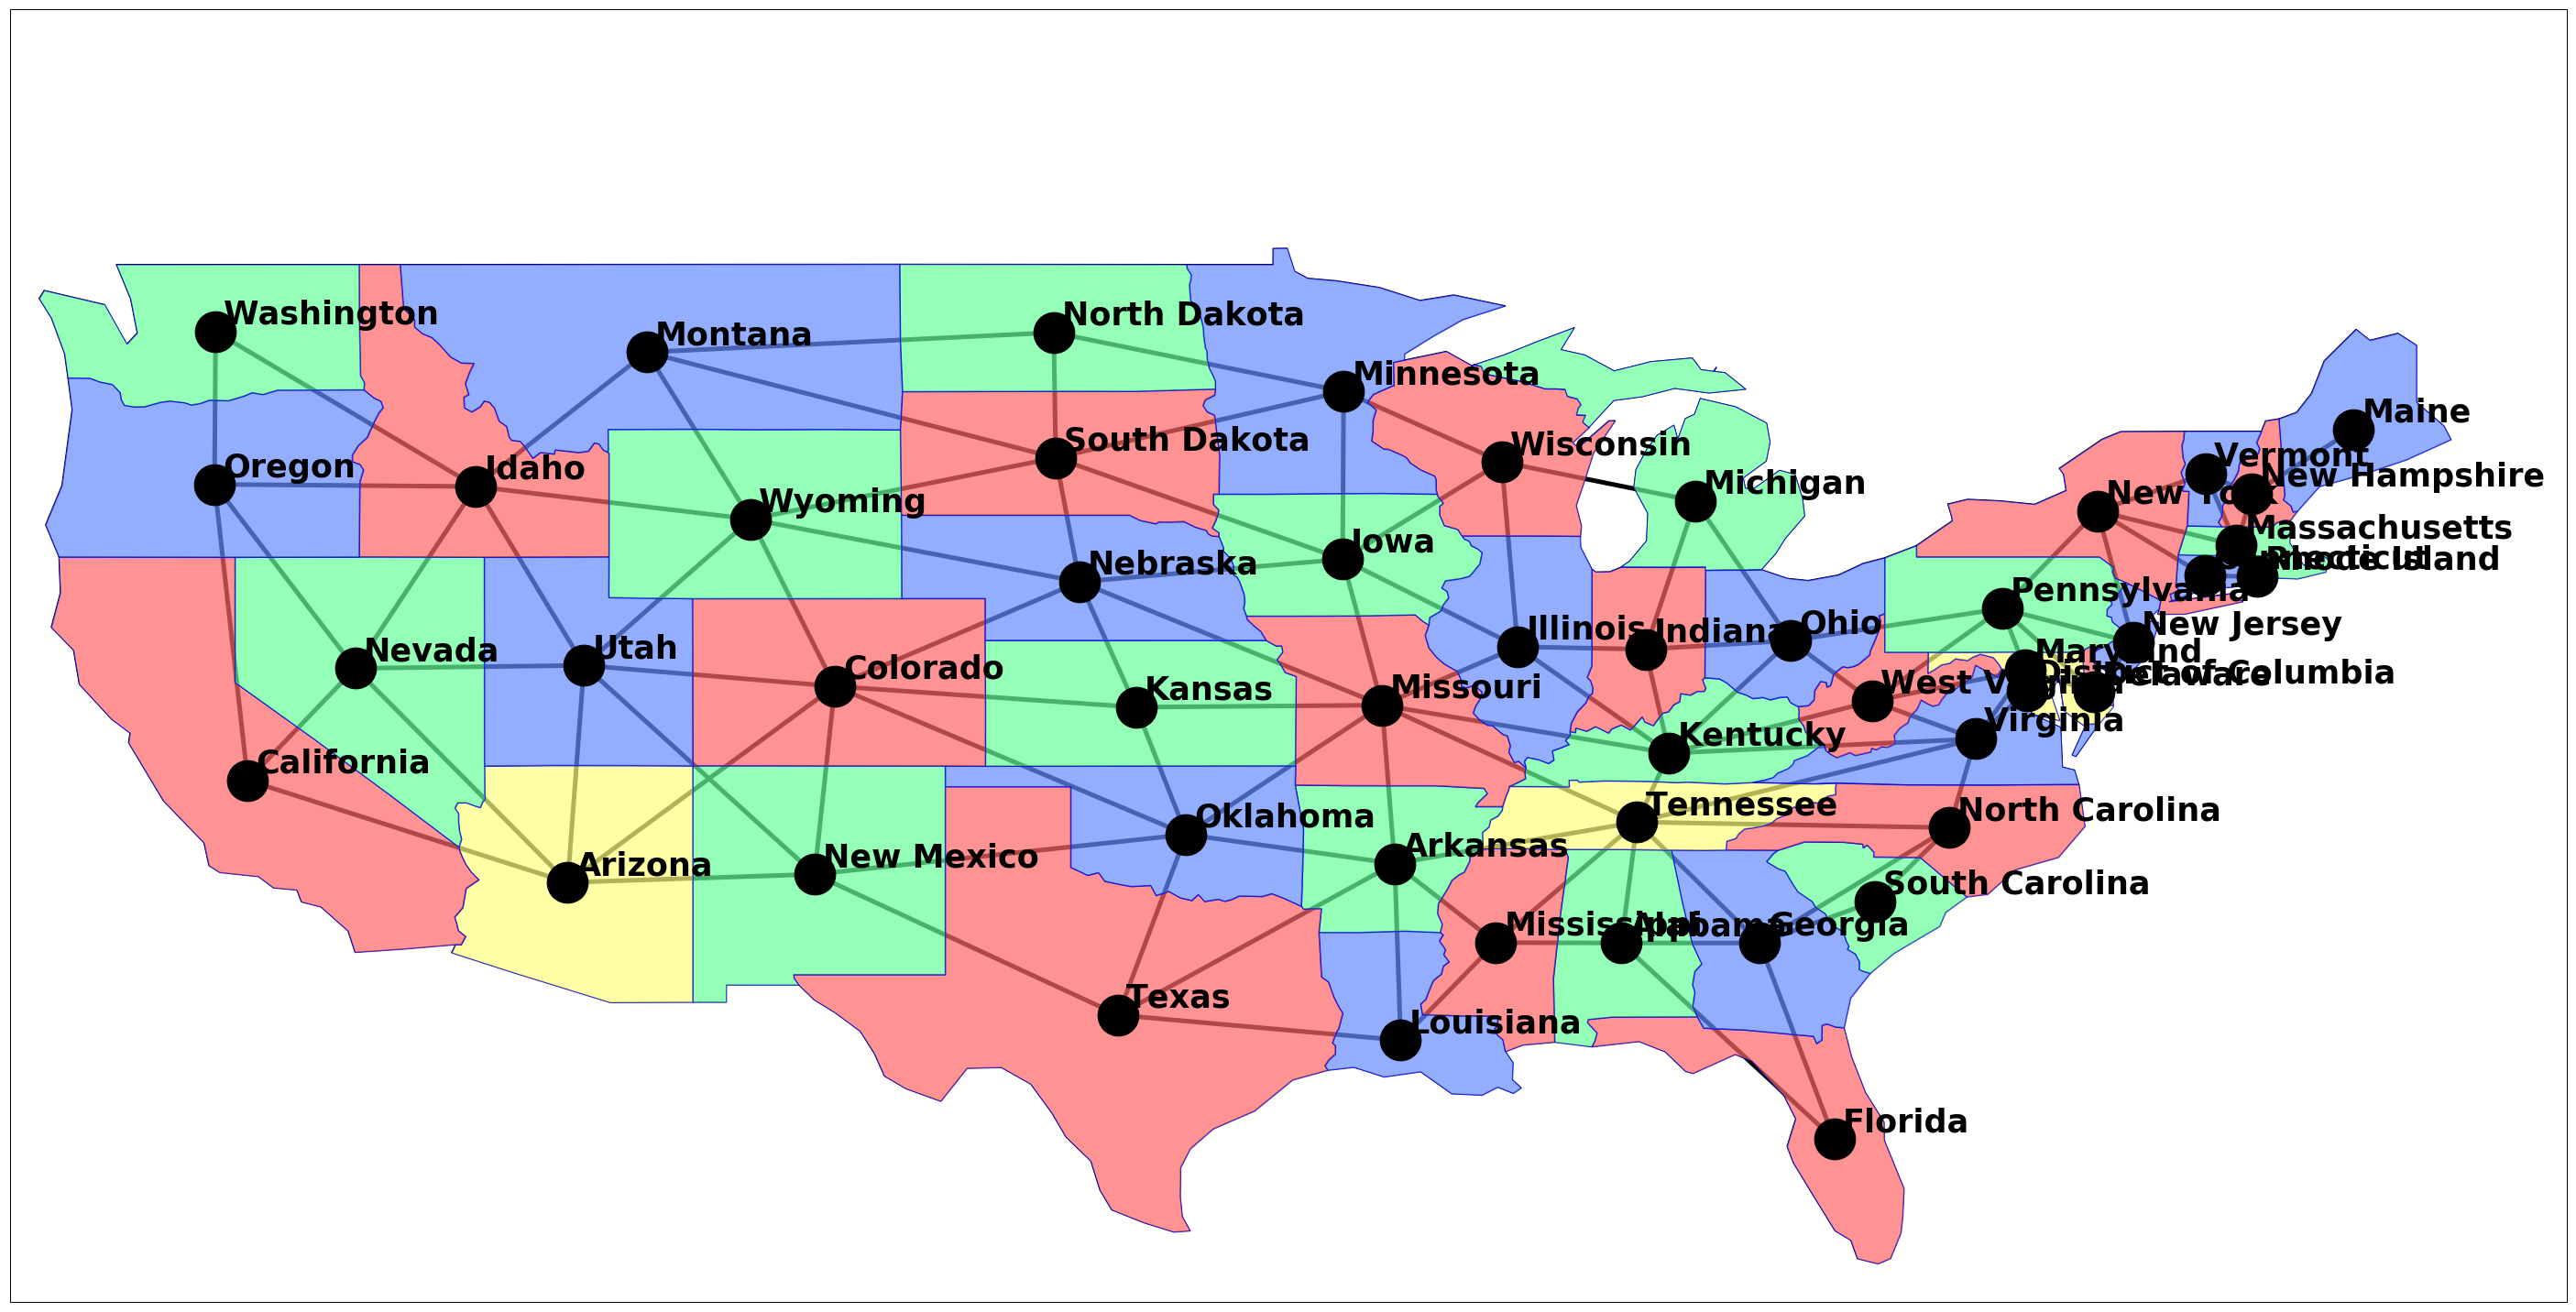

In [111]:
# the whole country
plot_states(include='all')

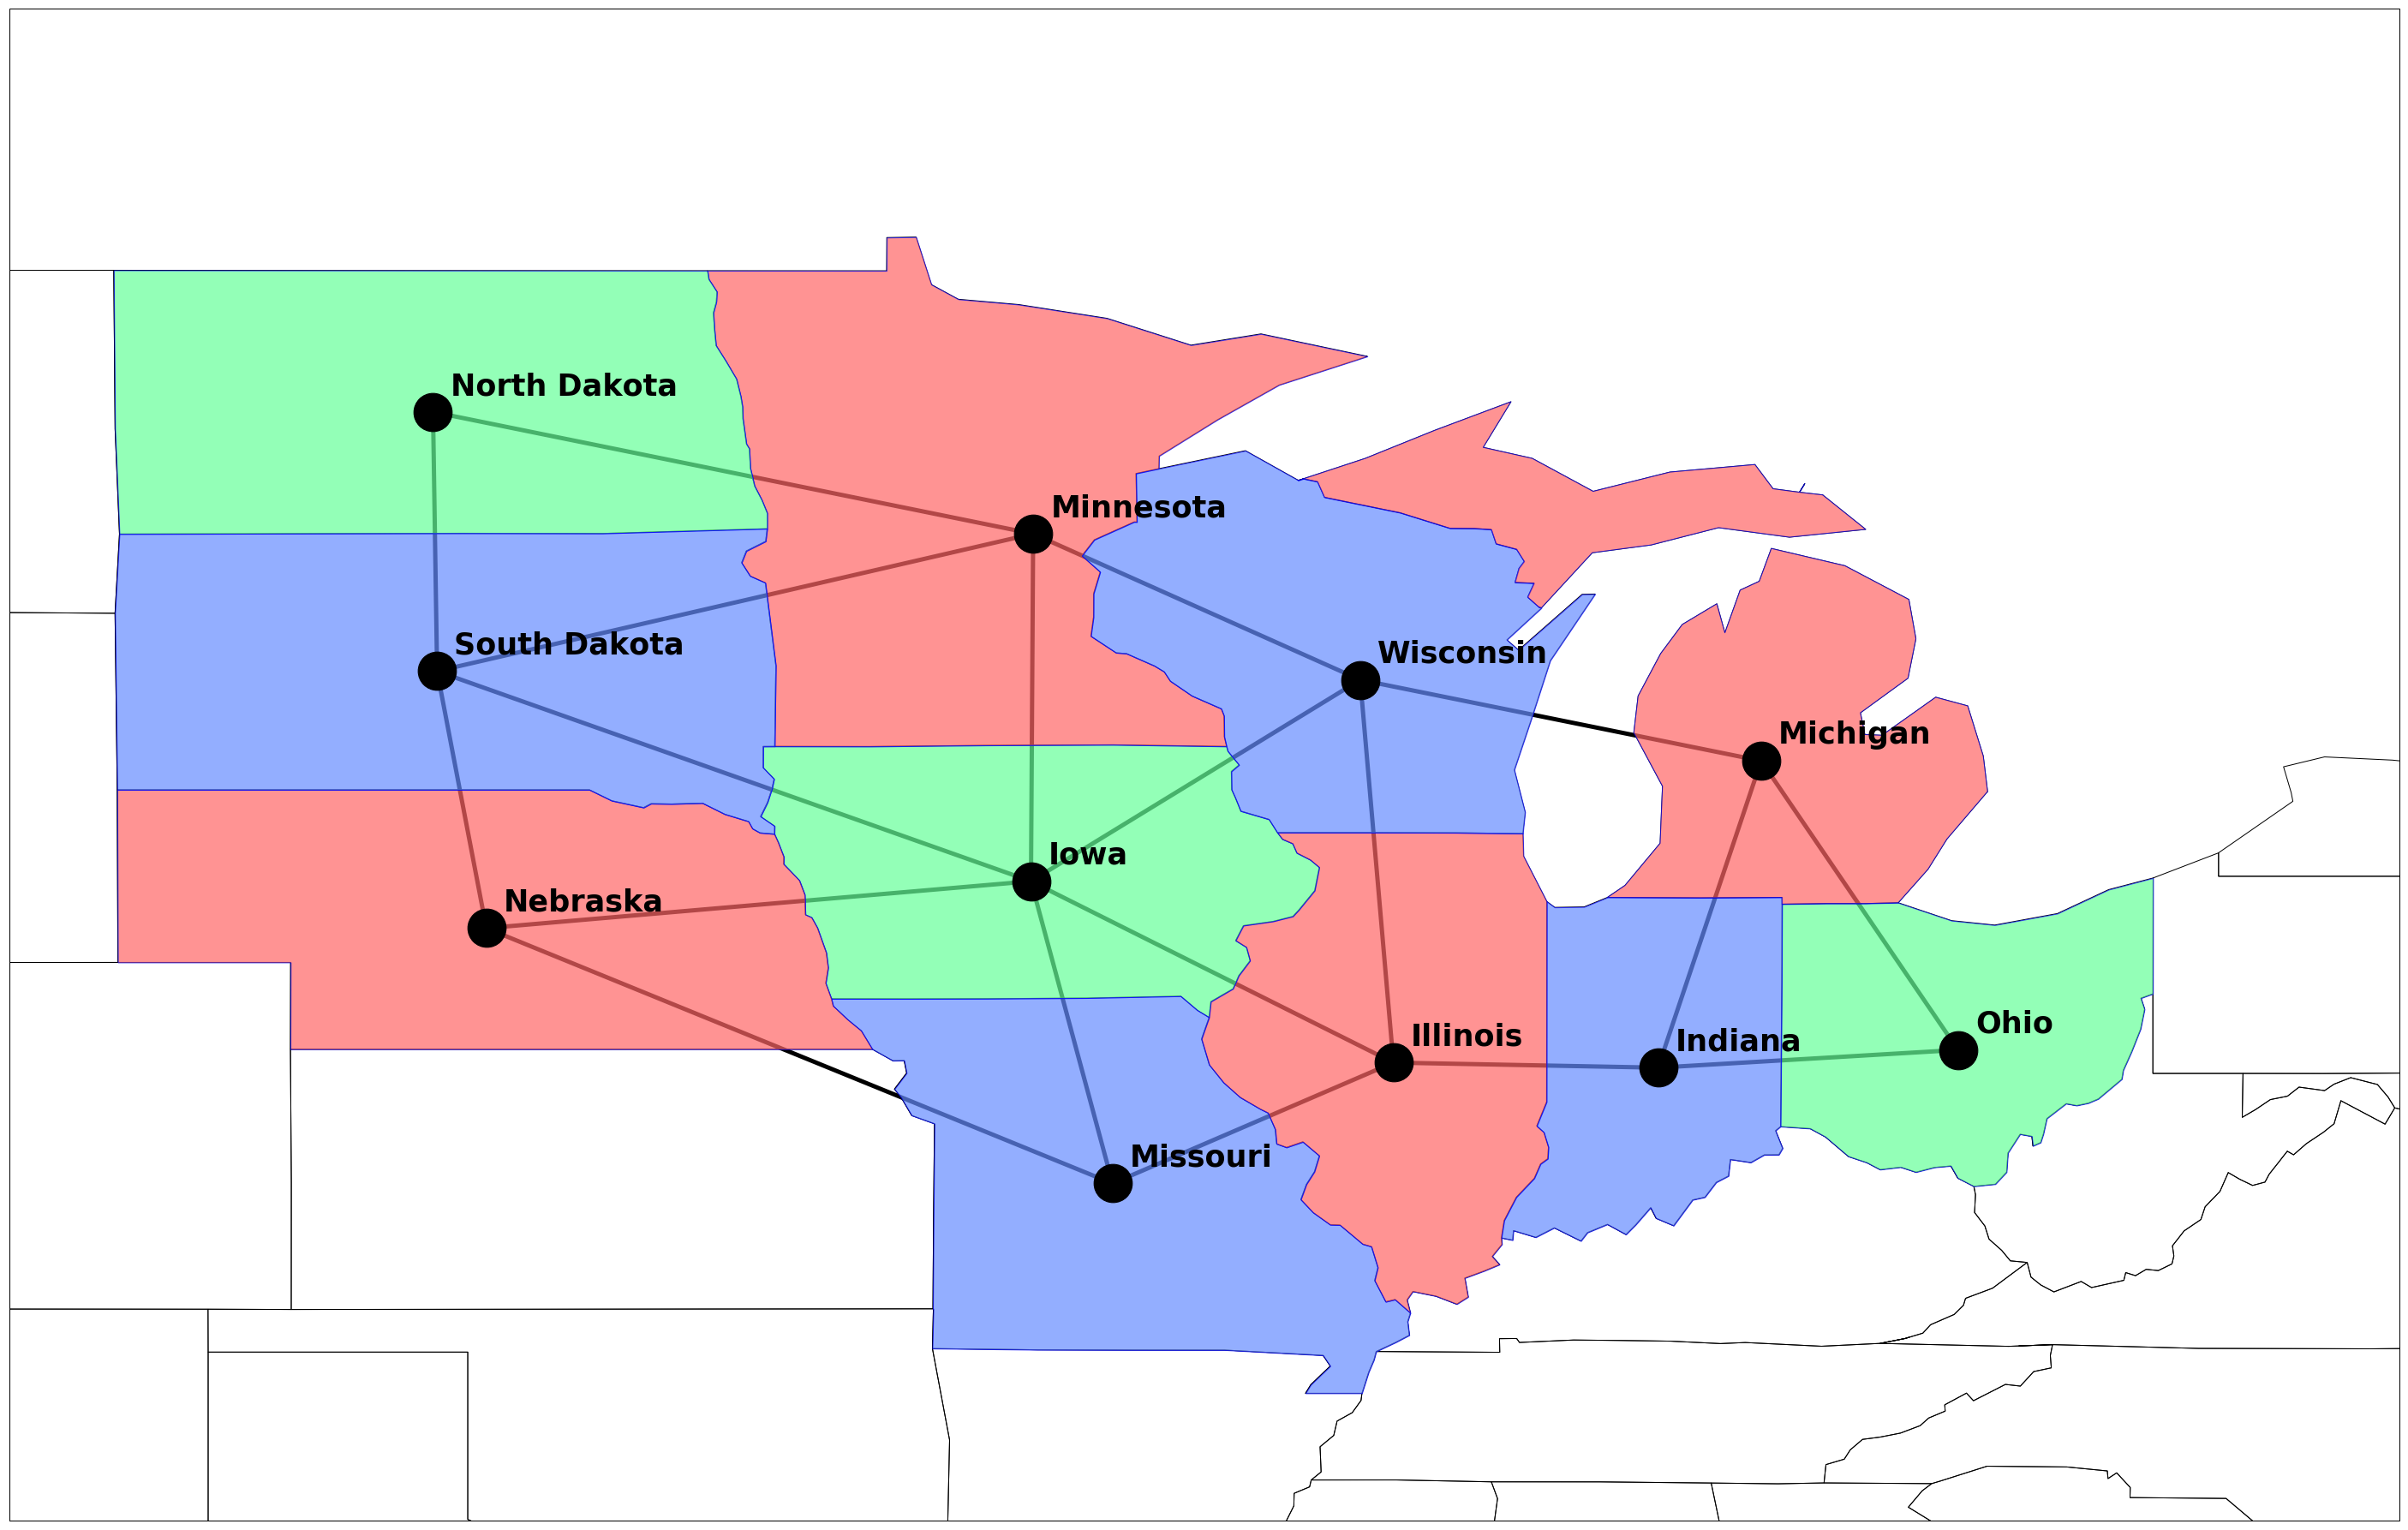

In [122]:
# midwest 
plot_states(include=('IL', 'IA', 'KA', 'MO', 'ND', 'SD', 'NE', 'WI', 'MI', 'OH', 'IN', 'MN'))

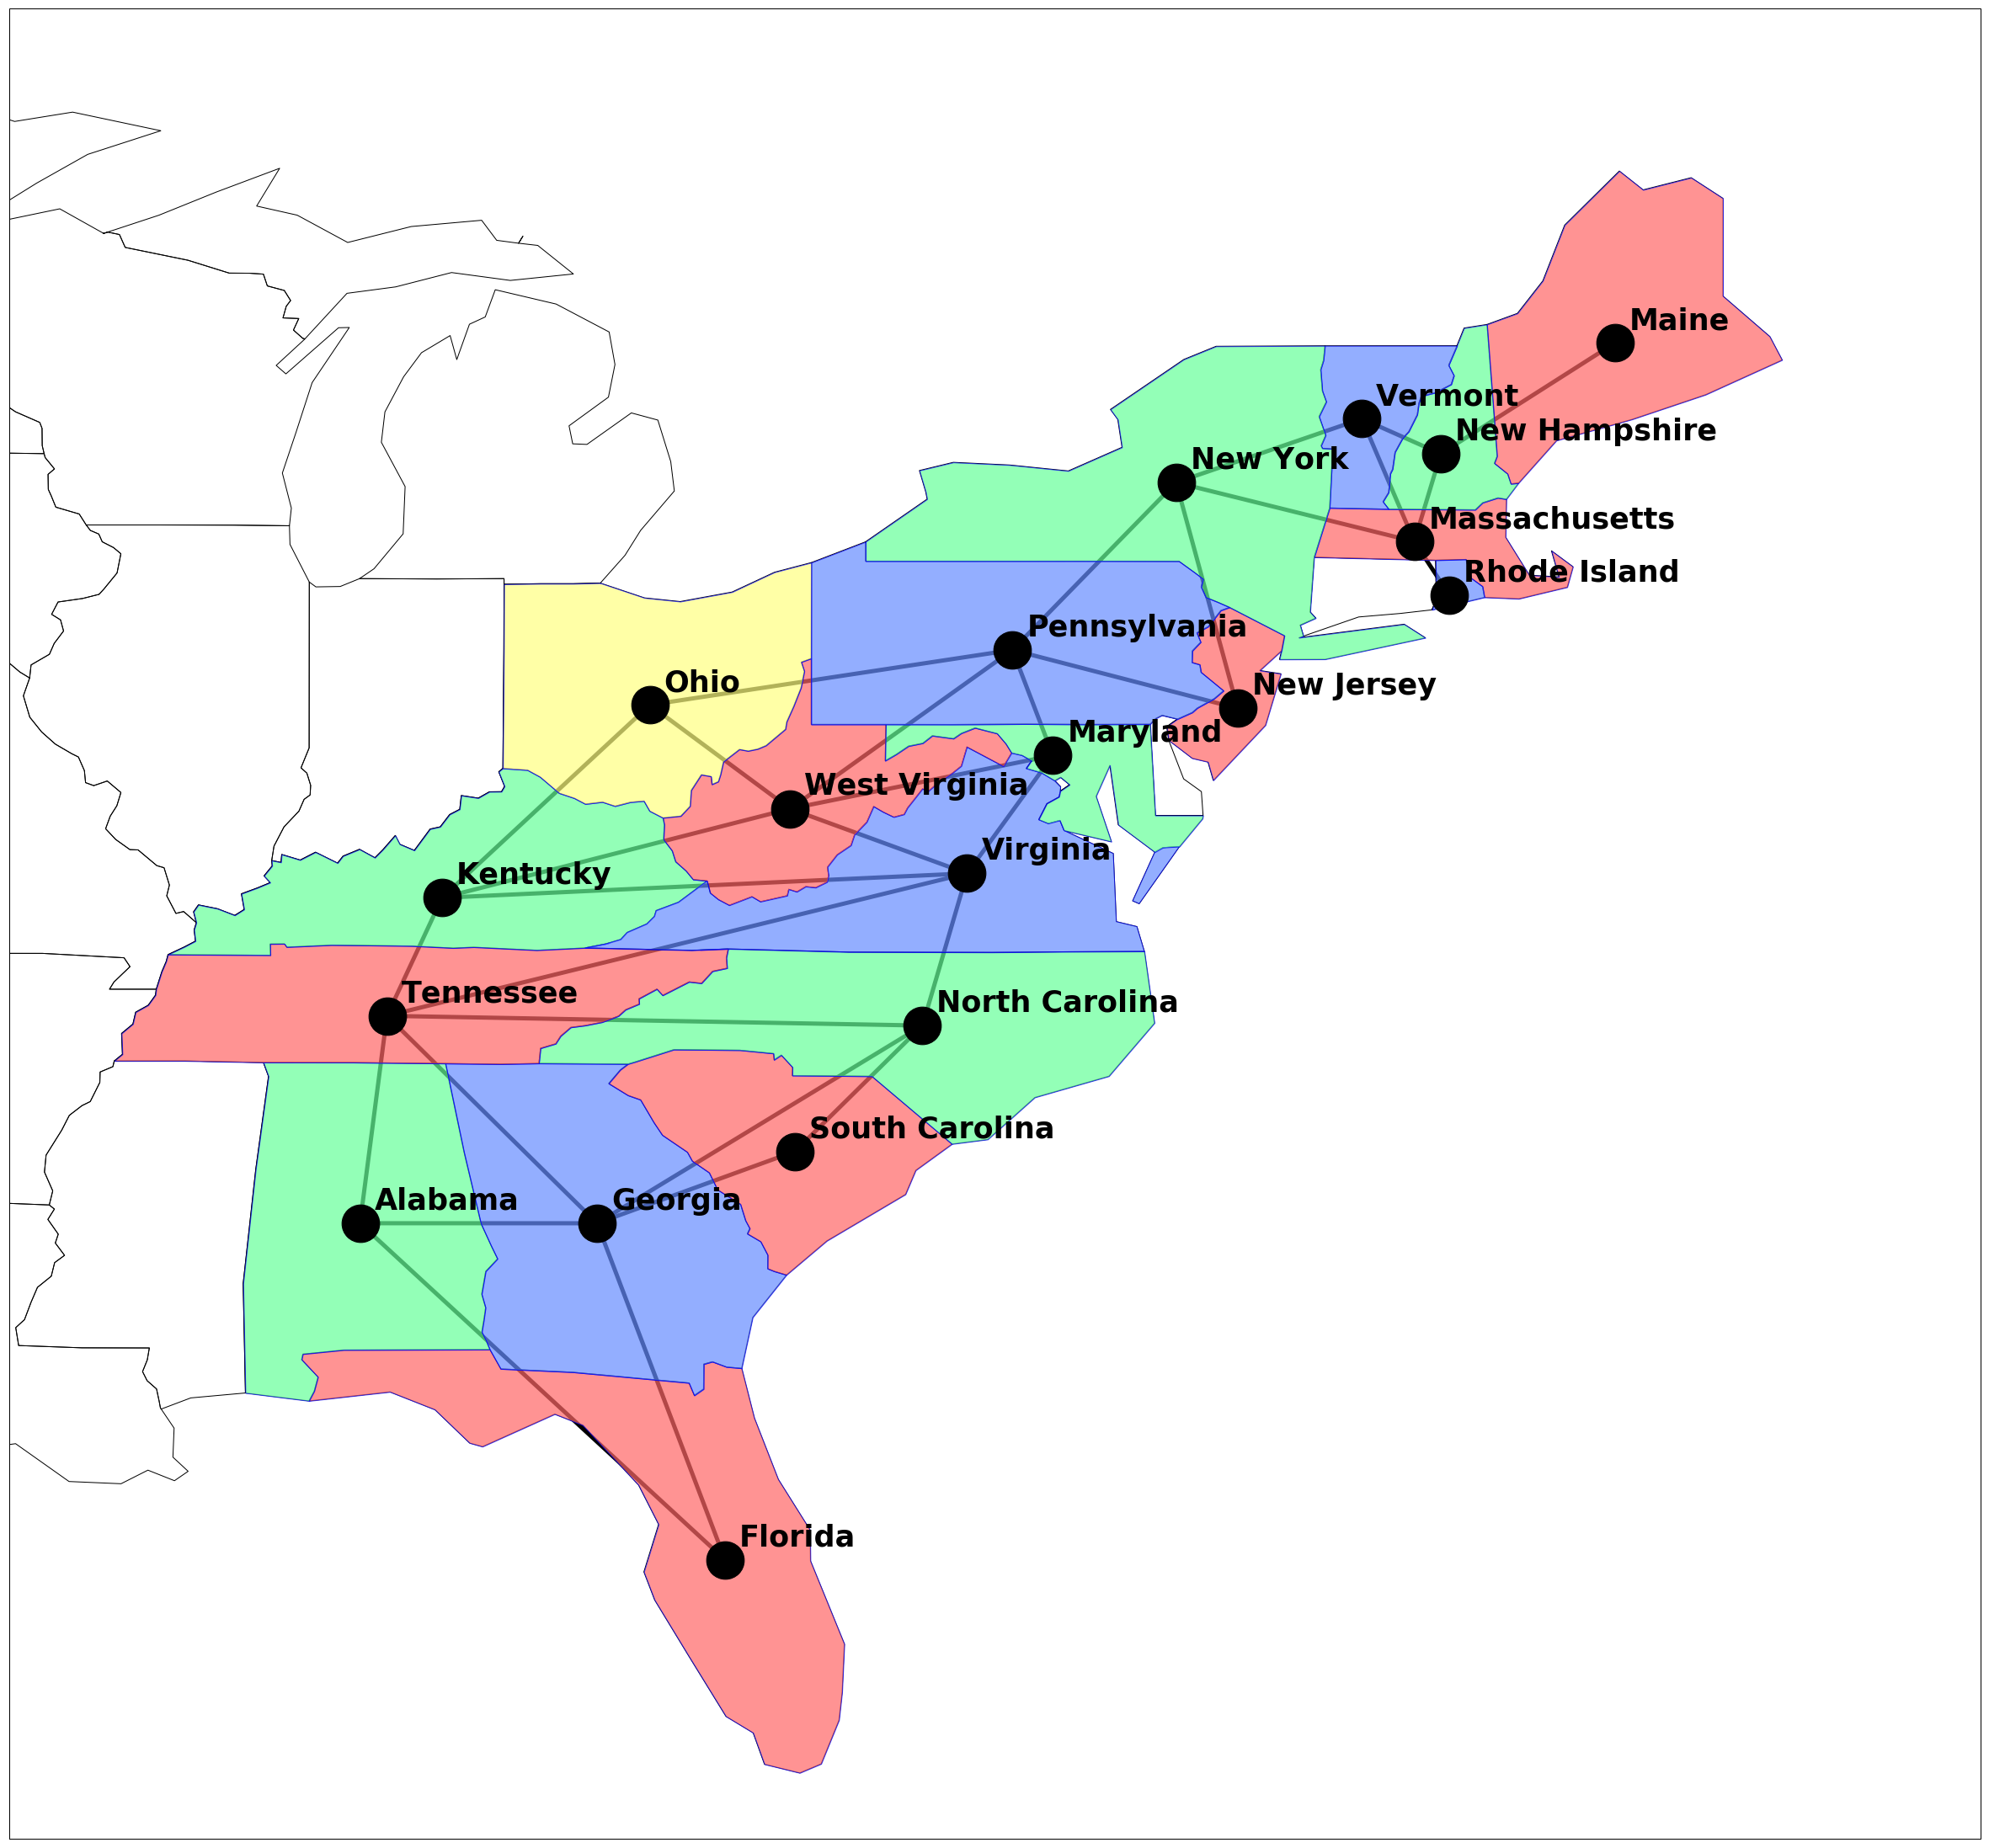

In [117]:
# east coast
plot_states(include=('ME', 'NH', 'RI', 'NY', 'OH', 'KY', 'VT', 'MA', 'PA', 'MD', 
                     'TN', 'AL', 'NJ', 'NY', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL'))

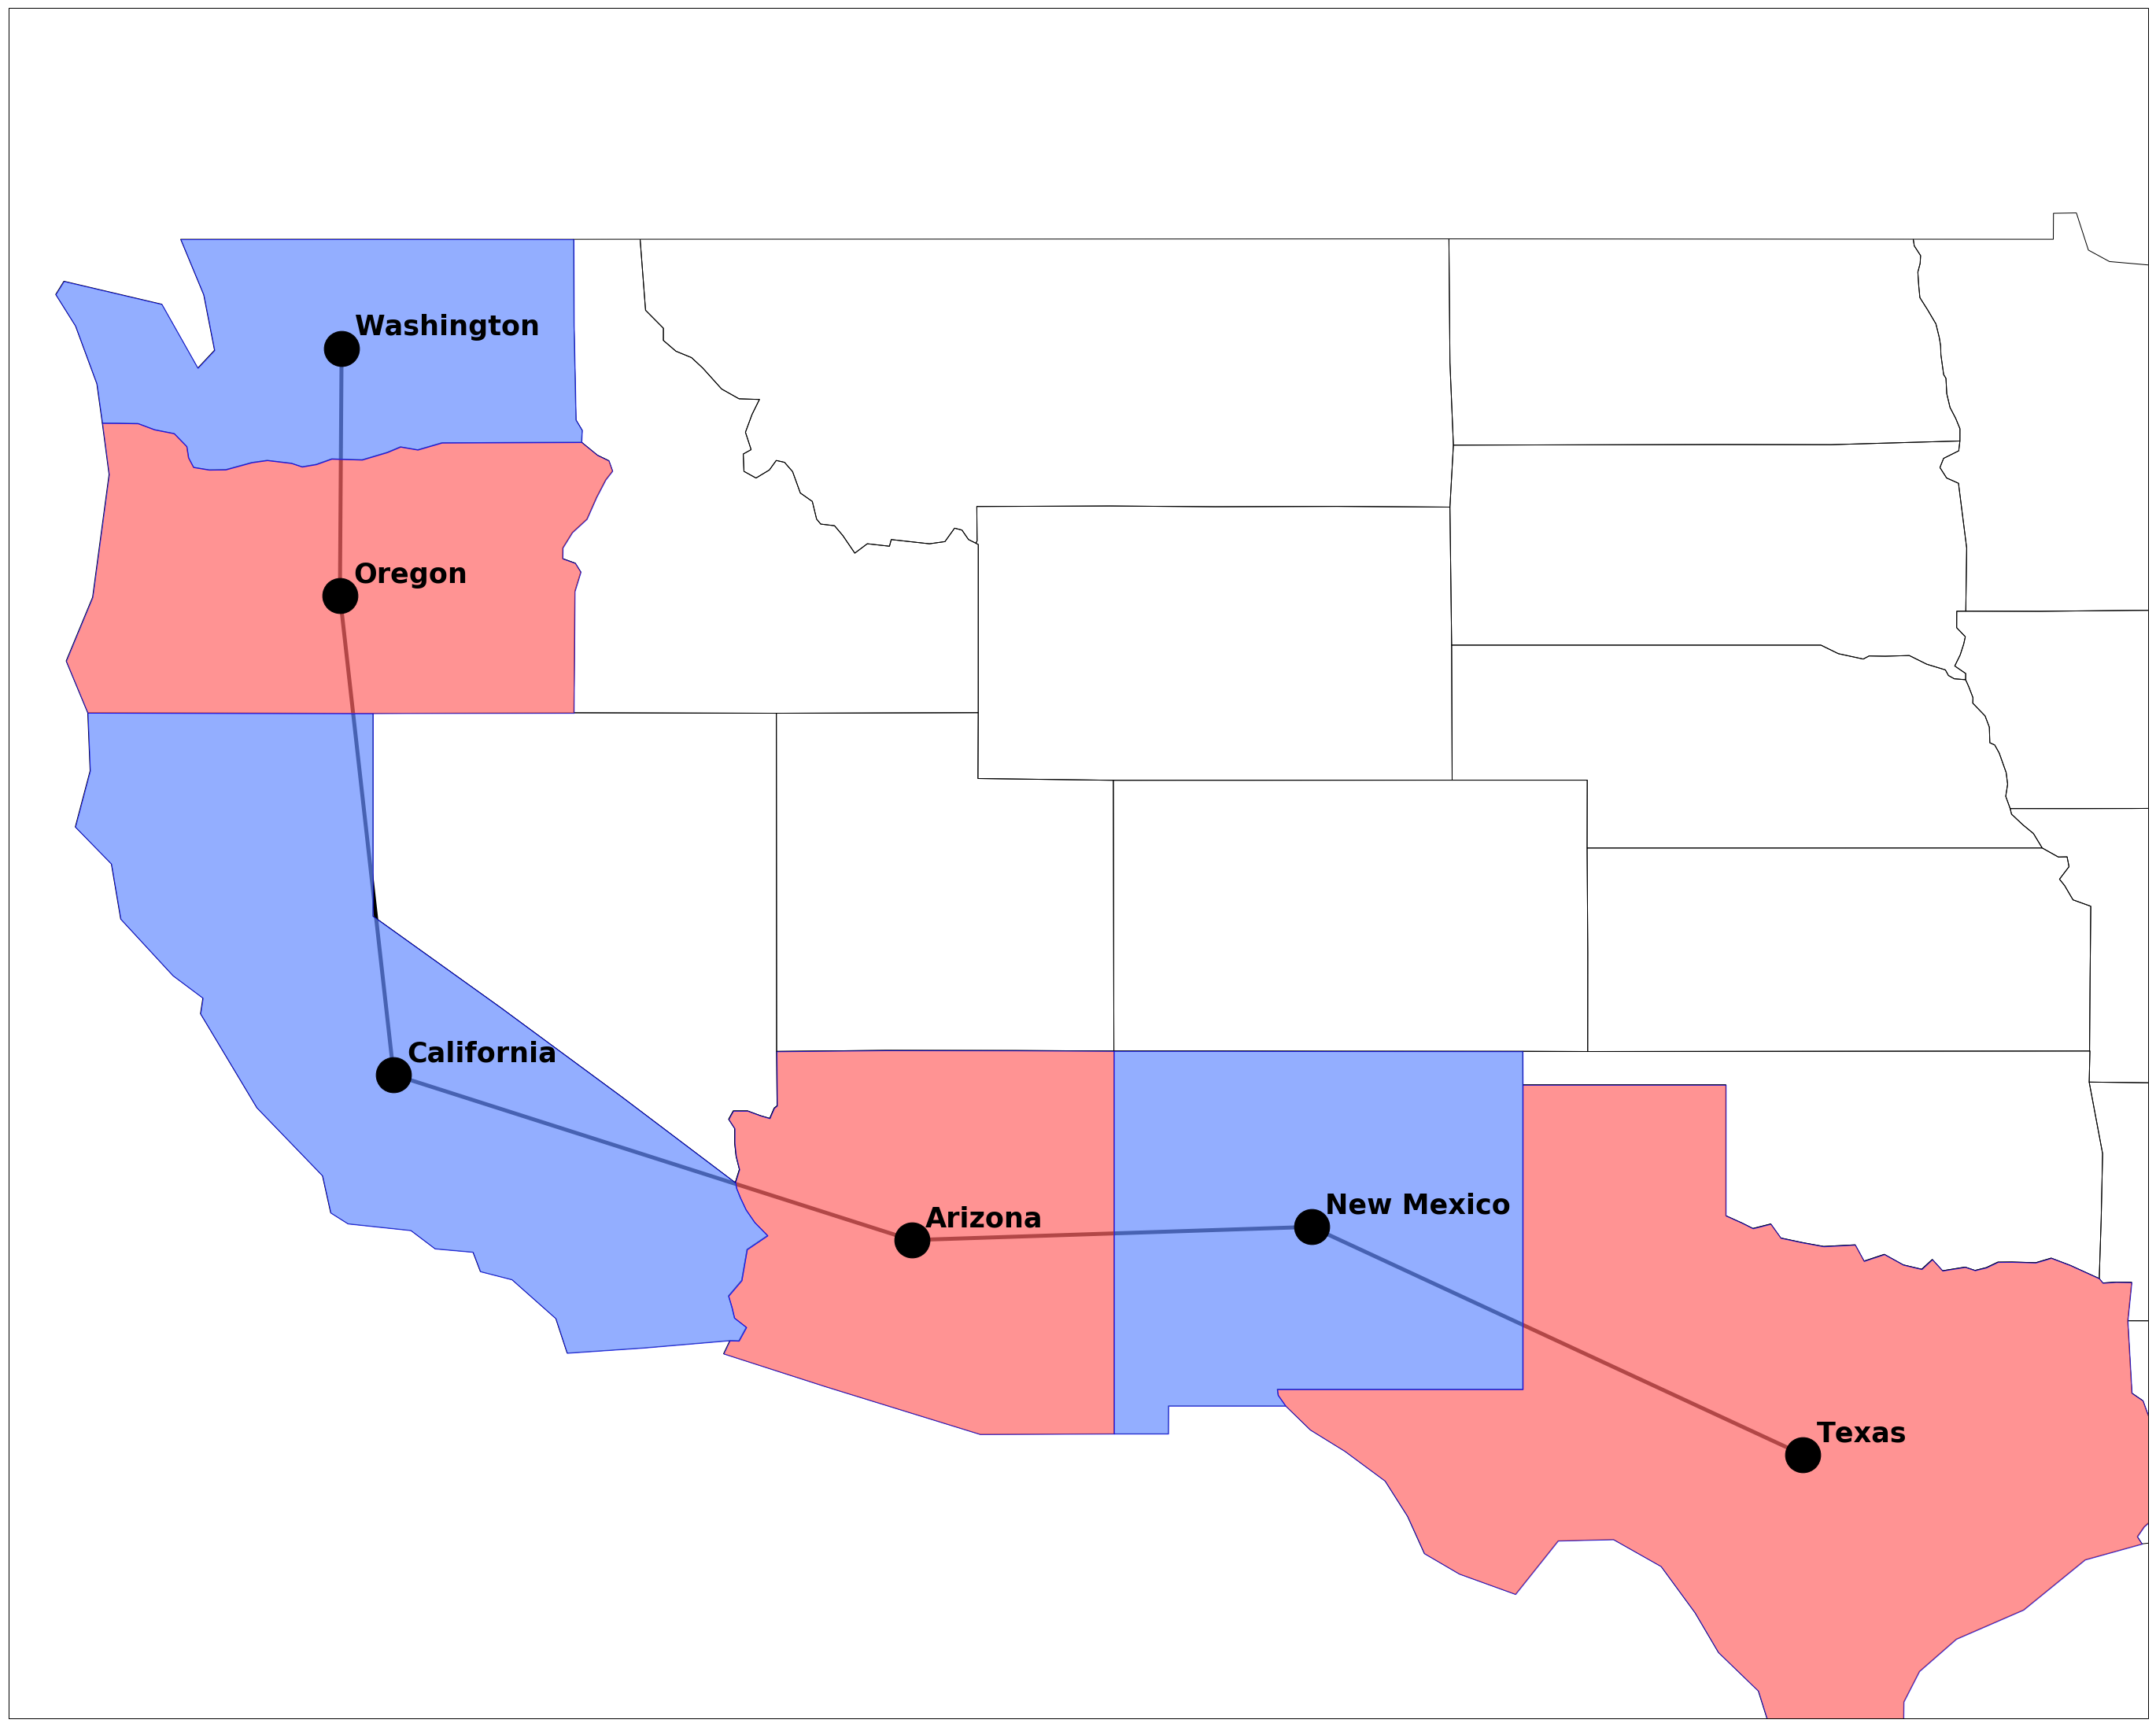

In [112]:
# chain - west coast
plot_states(include=('WA', 'OR', 'CA', 'AZ', 'NM', 'TX'))

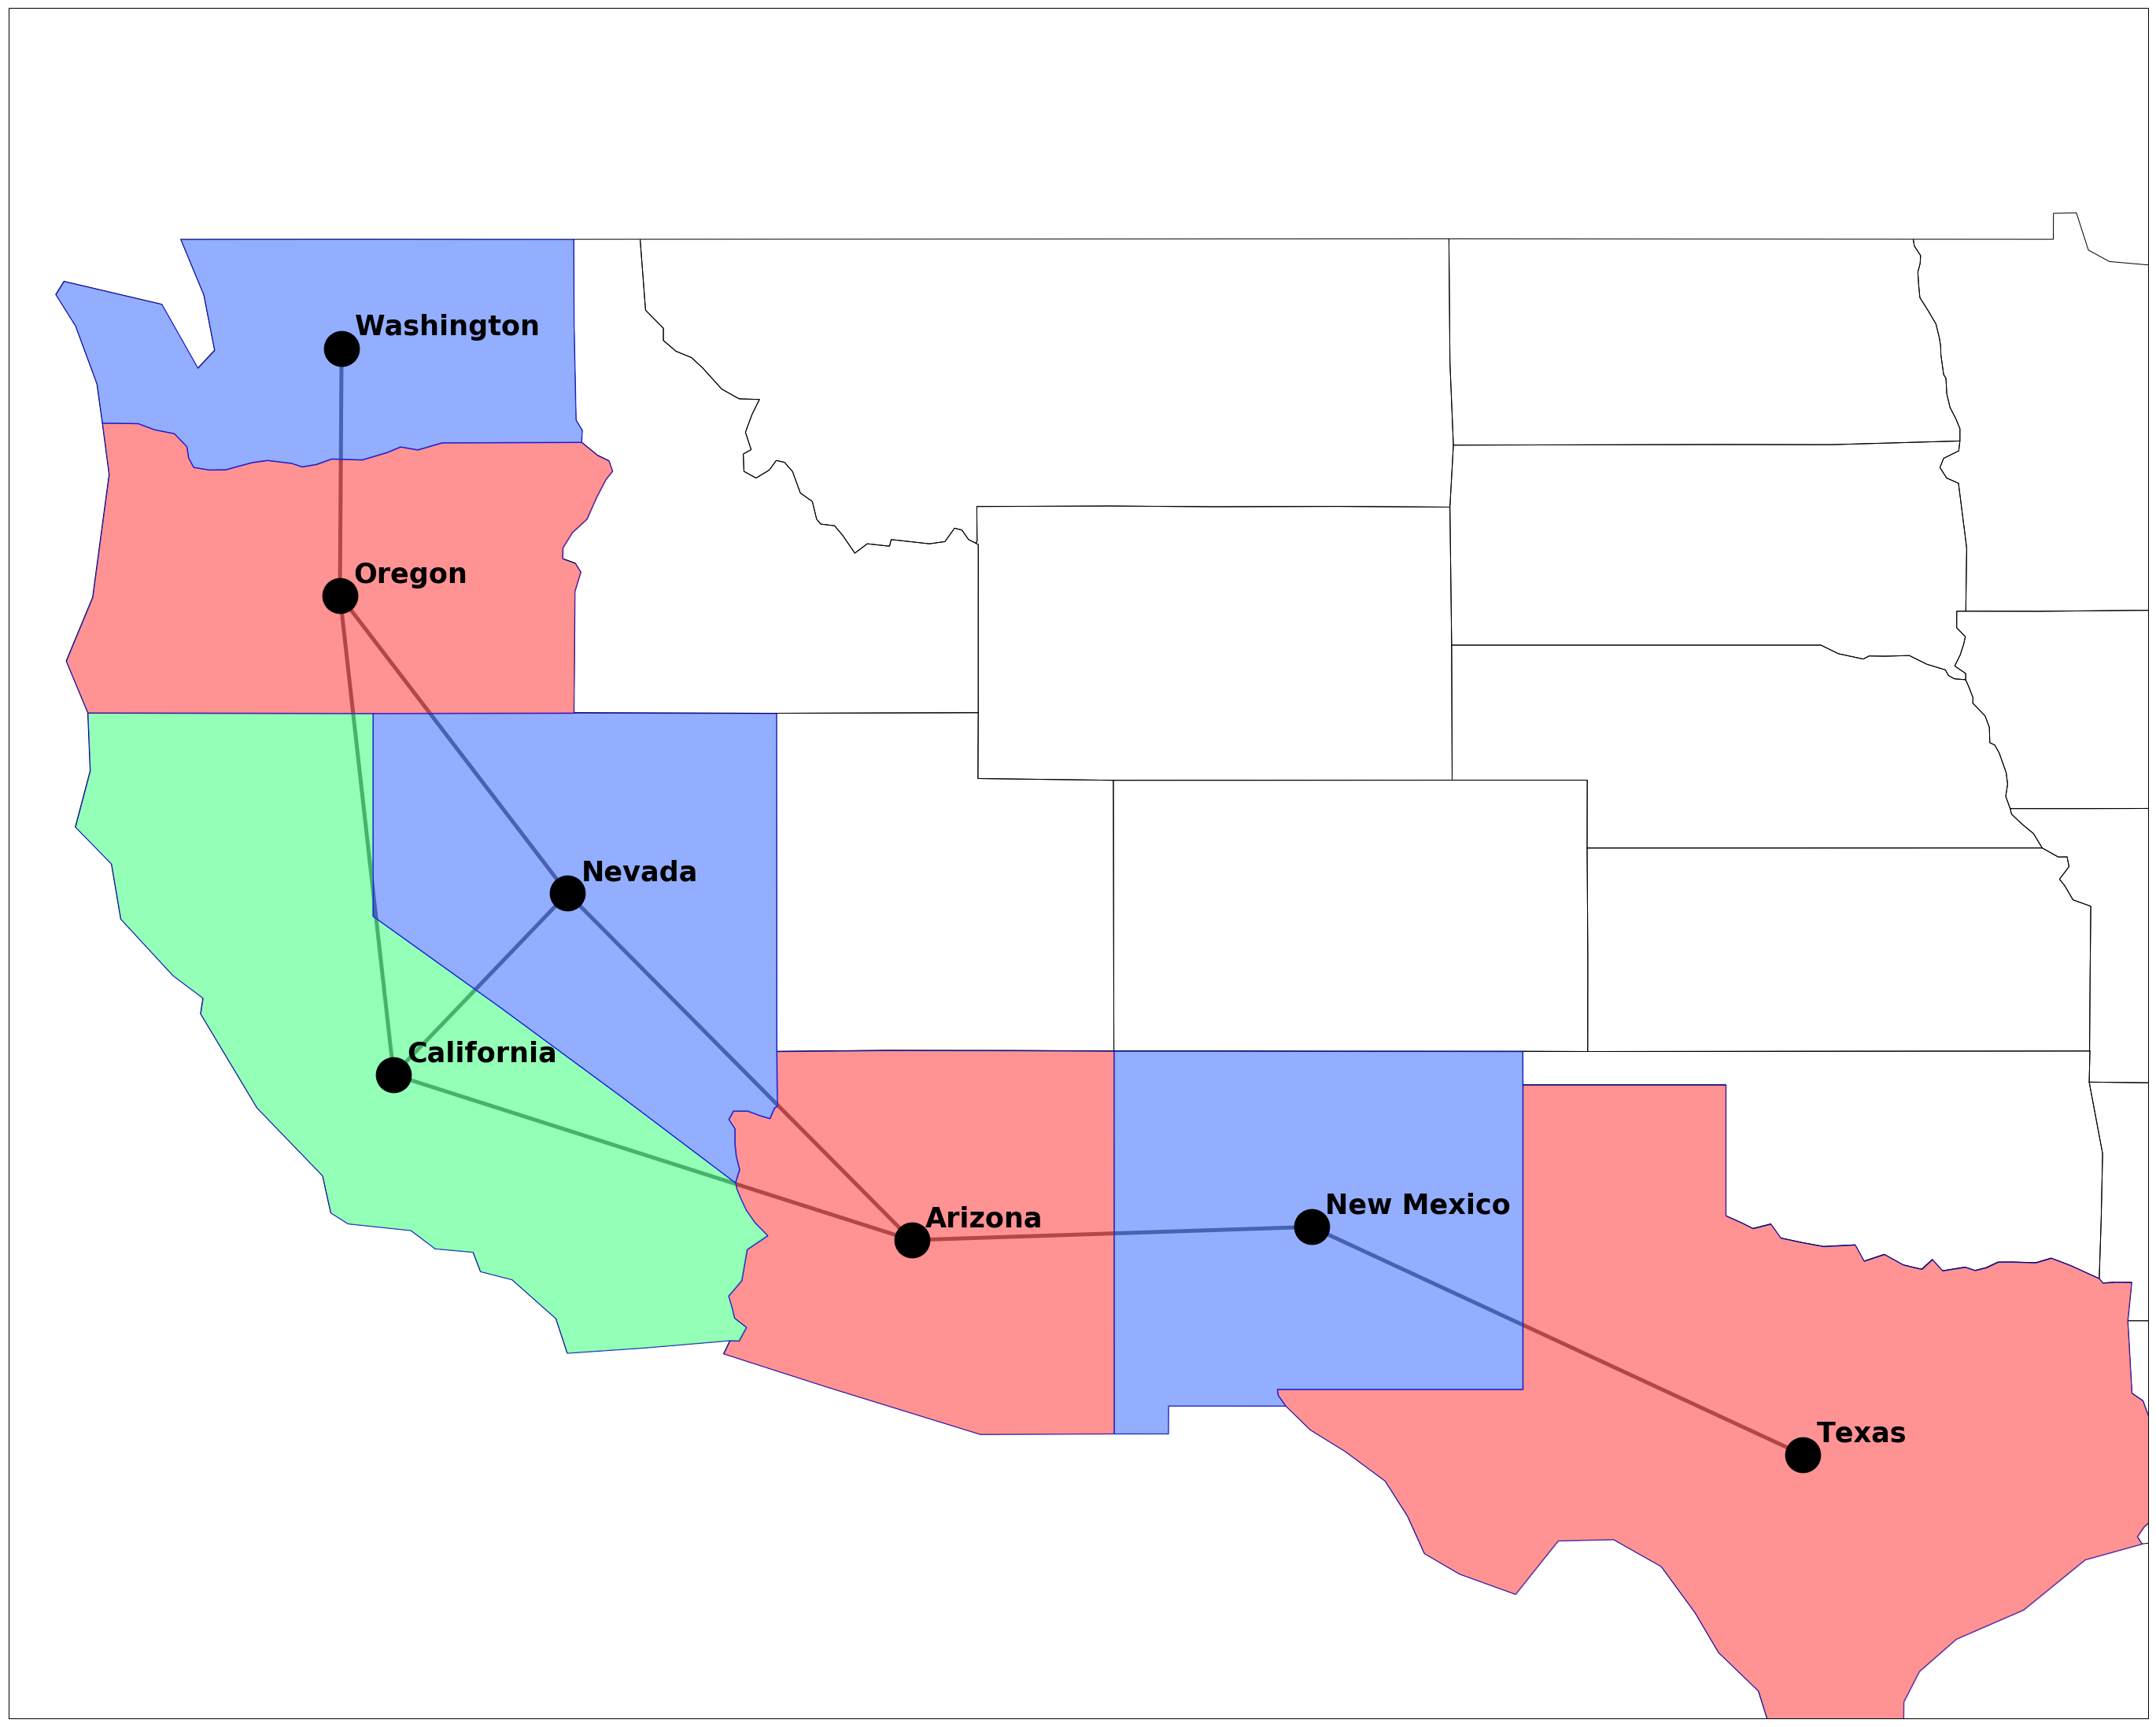

In [113]:
# not chain - west coast incl Nevada
plot_states(include=('WA', 'OR', 'CA', 'NV','AZ', 'NM', 'TX'))